In [242]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [243]:
# Define polarization state
# x_mag and y_mag both describe electric fields magnitudes. They are measured in V/m or N/kg
x_mag = 4
phi_x = np.deg2rad(0)
y_mag = 4
phi_y = np.deg2rad(90)

$\mathbf{E}(z,t) = \left(E_x e^{i\phi_x}\hat{x} + E_y e^{i\phi_y}\hat{y}\right)e^{i(kz-\omega t)}$

Since our goal is to create a static 3D graph, we will freeze time at $t=0$.

$\mathbf{E}(z,t) = \left( E_x e^{i\phi_x}\hat{x} + E_y e^{i\phi_y} \hat{y} \right) e^{ikz}$

In [244]:
# Constant declaration
wavelength = 520e-9
k = 2*np.pi/wavelength

# Linspace, designed such that kz_min = 0  and kz_max = n*pi... see markdown below for explanation
n = 3
z_max = n*wavelength

div = 200  # Specifies the divisions of z
z = np.linspace(0,z_max,div)

I want a graph with $n$ periods/wavelengths, so if we expand $\mathbf{E}(z)$:

$\mathbf{E}(z) = \left( E_x e^{i\phi_x}\hat{x} + E_y e^{i\phi_y} \hat{y} \right) \left[\cos(kz) + i\sin(kz)\right]$

We see the periodic behavior clearly from the trigonometric functions. Starting at $z=0$, the wave completes a full period at $kz = 2\pi$. For 5 wavelengths, we thus need $0 \leq kz \leq 10\pi$. Substituting $k = \tfrac{2\pi}{\lambda}$, we find $z_{max} = n\lambda$

In [245]:
# 3D graphing calculations
E = np.array([x_mag*np.e**(1j*(k*z + phi_x)), y_mag*np.e**(1j*(k*z + phi_y))])
E_x = E[0].real
E_y = E[1].real

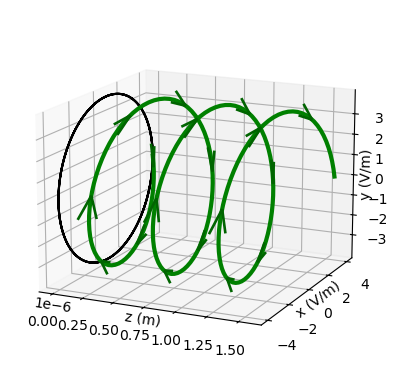

In [261]:
# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Label the axes
ax.set_xlabel('z (m)', labelpad=-15)
ax.set_ylabel('x (V/m)', labelpad=-15)
ax.set_zlabel('y (V/m)', labelpad=-15)


# Plot the 2D curve on the xy-plane at z=0
ax.plot(E_x, E_y, zs=0, zdir='x', color='black')

# Plot the curve with deep green color
ax.plot(z, E_x, E_y, color='green', linewidth=3)

# Specify the indices where you want to place arrows
num_arrows = 6*n
arrow_indices = []

for i in range(num_arrows):
    arrow_indices.append(int((i) * div/num_arrows) + 1)

# Create lists to store coordinates and directions for arrows
arrow_coords = []
arrow_directions = []

for idx in arrow_indices:
    arrow_coords.append((z[idx], E_x[idx], E_y[idx]))  # Coordinates of arrow starting point
    arrow_directions.append((z[idx+1]-z[idx], E_x[idx+1]-E_x[idx], E_y[idx+1]-E_y[idx]))  # Direction of arrow

# Add arrows at specified coordinates and directions
scalefactor = 1
for coord, direction in zip(arrow_coords, arrow_directions):
    ax.quiver(*coord, *direction, color='darkgreen', length=0.5*scalefactor, arrow_length_ratio=6, linewidth=1.9)

# Change viewing angle
ax.view_init(elev=15, azim=-65)

plt.savefig("3D_polarization.png", bbox_inches='tight', pad_inches=0.1)

plt.show()

In [247]:
# Determine some useful quantities from that
E_eff = np.sqrt(x_mag**2 + y_mag**2)        
A = x_mag / E_eff
B = y_mag / E_eff
delta = phi_y - phi_x

# Define Jones vector
jonesVec = np.array([A, B*np.e**(delta*1j)])

In [248]:
print(jonesVec[0])
print(jonesVec[1])

(0.7071067811865475+0j)
(4.329780281177466e-17+0.7071067811865475j)
